# Röntgenfluoreszenz

In [10]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
%matplotlib inline 
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [11]:
#fit functions
#mosleys law
def mosley(x, Er_sqrt, sig12):
    return Er_sqrt*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

## Messung verschiedener Elemente

In [12]:
#measured data
#Elements in the order Fe, Ti, Ag, Mo, Ni, Zn, Cu, Zr
Z = np.array([26, 22, 47, 42, 28, 30, 29, 40]) #atomic number
K_alpha = np.array([6.41, 4.43, 21.96, 17.48, 7.50, 8.68, 8.06, 15.81]) #energy of K_alpha
K_alpha_err = np.array([15, 17, 17, 17, 16, 16, 16, 16])*1e-2
K_alpha_sqrt = np.sqrt(K_alpha)
K_alpha_sqrt_err = 0.5*K_alpha_err/K_alpha_sqrt
K_beta = np.array([7.05, 4.76, 24.56, 19.59, 8.29, 9.63, 8.93, 17.69]) #energy of K_beta
K_beta_err = np.array([18, 19, 13, 21, 17, 16, 17, 18])*1e-2
K_beta_sqrt = np.sqrt(K_beta)
K_beta_sqrt_err = 0.5*K_beta_err/K_beta_sqrt

In [13]:
#fit mosley function to mesured data, K_alpha
n1 = 1 #fuction parameters for K_alpha
n2 = 2
popta, pcova = curve_fit(mosley, Z, K_alpha_sqrt, sigma=K_alpha_sqrt_err)
perra = np.sqrt(np.diag(pcova))

#show fit parameters
print('K_alpha Peak:')
print('Er_sqrt', popta[0], '+-', perra[0])
print('sig12', popta[1], '+-', perra[1])

K_alpha Peak:
Er_sqrt 0.118793285672 +- 0.00028723702113
sig12 1.39545302039 +- 0.0879999611735


In [14]:
#fit quality
chi_squared1=np.sum((mosley(Z,*popta)-K_alpha_sqrt)**2/K_alpha_sqrt_err**2)
dof1=Z.size-2
chi_squared_red1=chi_squared1/dof1
print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared_red1))
print()

prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 0.335705982611
chi_squared_red= 0.0559509971018

Die Fitwahrscheinlichkeit beträgt: 100.0 %


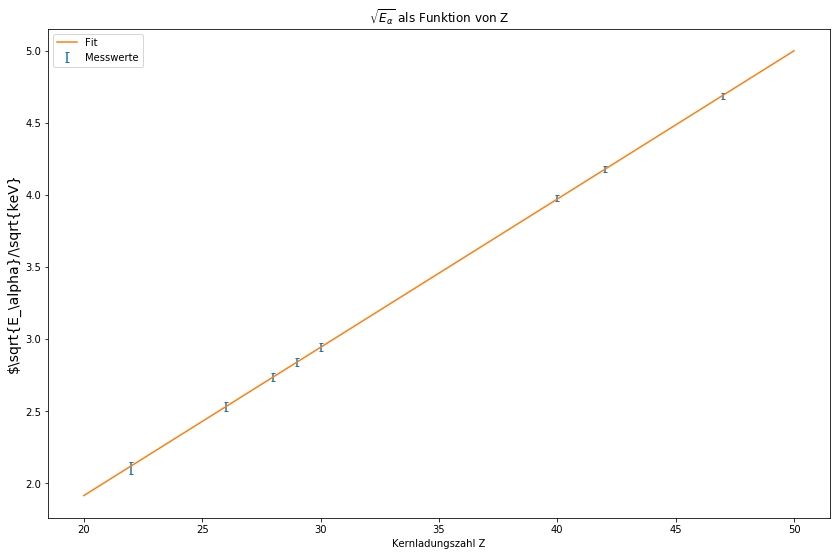

In [15]:
#plot data and fit fuction
x = np.linspace(20, 50, 20)
plt.figure('Energie_sqrt')
plt.errorbar(Z, K_alpha_sqrt, K_alpha_sqrt_err, label = 'Messwerte', linestyle = 'None')
plt.plot(x, mosley(x, *popta), label = 'Fit')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha}/\sqrt{keV}', fontsize=14)
plt.title(r'$\sqrt{E_\alpha}$ als Funktion von Z')
plt.legend(frameon = True)
plt.savefig('Diagramme/Energie, alpha.pdf')

In [17]:
#fit mosley function to mesured data, K_beta
n1 = 1 #fuction parameters for K_beta
n2 = 3
poptb, pcovb = curve_fit(mosley, Z, K_beta_sqrt, sigma=K_beta_sqrt_err)
perrb = np.sqrt(np.diag(pcovb))

#show fit parameters
print('K_beta Peak')
print('Er_sqrt', poptb[0], '+-', perrb[0])
print('sig13', poptb[1], '+-', perrb[1])

K_beta Peak
Er_sqrt 0.116419166791 +- 0.000533213556144
sig13 1.78707685838 +- 0.173348175124


In [8]:
#fit quality
chi_squared2=np.sum((mosley(Z,*poptb)-K_beta_sqrt)**2/K_beta_sqrt_err**2)
dof2=Z.size-2
chi_squared_red2=chi_squared2/dof2
print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared_red2))
print()

prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100
print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 1.62632174433
chi_squared_red= 0.271053624056

Die Fitwahrscheinlichkeit beträgt: 95.0 %


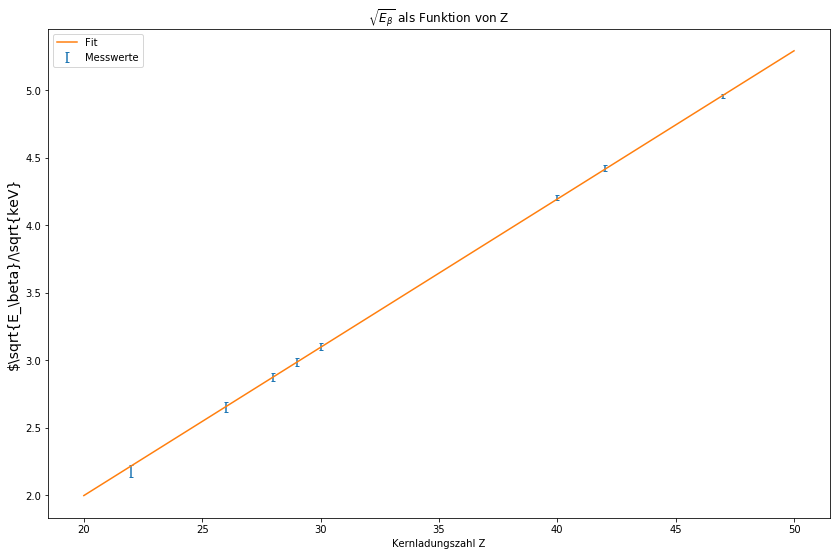

In [9]:
#plot data and fit fuction
x = np.linspace(20, 50, 20)
plt.figure('Energie_sqrt')
plt.errorbar(Z, K_beta_sqrt, K_beta_sqrt_err, label = 'Messwerte', linestyle = 'None')
plt.plot(x, mosley(x, *poptb), label = 'Fit')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\beta}/\sqrt{keV}', fontsize=14)
plt.title(r'$\sqrt{E_\beta}$ als Funktion von Z')
plt.legend(frameon = True)
plt.savefig('Diagramme/Energie, beta.pdf')